In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Hamming and chemical distance files
with open("./output_files/tests/cdr3/test_ham.json", 'r') as hamming_file:
    hamming_data = json.load(hamming_file)

with open("./output_files/tests/cdr3/test_full.json", 'r') as chemical_file:
    chemical_data = json.load(chemical_file)

# Define thresholds for "low" chemical distance and "high" Hamming distance
low_chemical_threshold = 1
high_hamming_threshold = 1

# Collect distances for visualization
distances = []

for seq in hamming_data:
    hamming_dists = dict(hamming_data.get(seq, []))
    chemical_dists = dict(chemical_data.get(seq, []))
    
    for compared_seq, hamming_dist in hamming_dists.items():
        chemical_dist = chemical_dists.get(compared_seq, None)
        
        if chemical_dist is not None:
            distances.append({
                "hamming_distance": hamming_dist,
                "chemical_distance": chemical_dist,
                "sequence_1": seq,
                "sequence_2": compared_seq
            })

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(distances)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


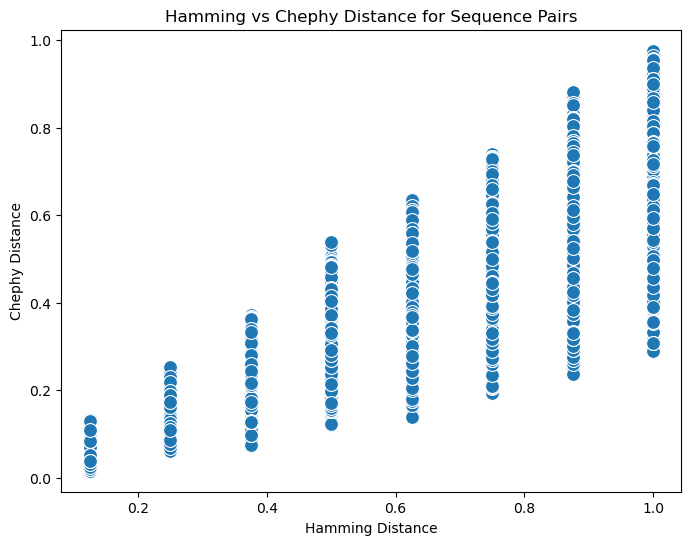

In [5]:

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a scatter plot with seaborn
sns.scatterplot(data=df, x='hamming_distance', y='chemical_distance', s=100)

# # Add threshold lines for "high" Hamming and "low" chemical distances
# plt.axhline(y=low_chemical_threshold, color='r', linestyle='--', label=f'Low Chemical Threshold ({low_chemical_threshold})')
# plt.axvline(x=high_hamming_threshold, color='b', linestyle='--', label=f'High Hamming Threshold ({high_hamming_threshold})')

# Add labels and title
plt.xlabel('Hamming Distance')
plt.ylabel('Chephy Distance')
plt.title('Hamming vs Chephy Distance for Sequence Pairs')

# Display legend and plot
plt.legend().remove()
plt.show()


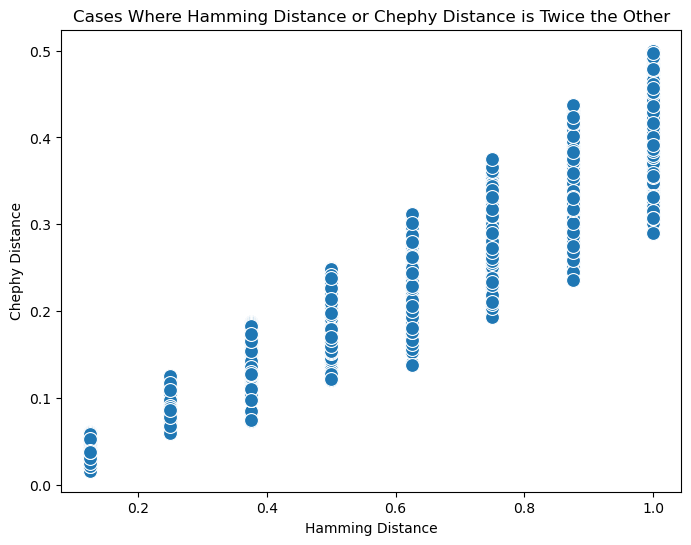

In [7]:
# Filter for cases where hamming distance is more than twice the chemical distance or vice versa
extreme_ratio_df = df[
    (df['hamming_distance'] >= 2 * df['chemical_distance']) | 
    (df['chemical_distance'] >= 2 * df['hamming_distance'])
]

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a scatter plot with seaborn for the extreme ratio cases
sns.scatterplot(data=extreme_ratio_df, x='hamming_distance', y='chemical_distance', s=100)

# Add labels and title
plt.xlabel('Hamming Distance')
plt.ylabel('Chephy Distance')
plt.title('Cases Where Hamming Distance or Chephy Distance is Twice the Other')

# Display the plot
plt.show()


In [11]:
# Add a column for the absolute difference between Hamming and chemical distances
df['abs_difference'] = abs(df['hamming_distance'] - df['chemical_distance'])

# Find the row with the greatest difference
greatest_diff_row = df.loc[df['abs_difference'].idxmax()]

# Display the greatest difference
print("Sequence pair with the greatest difference:")
print(greatest_diff_row)


Sequence pair with the greatest difference:
hamming_distance                   1.0
chemical_distance                 0.29
sequence_1           CASSIDLTSGVYNEQFF
sequence_2             CASTSVRDRLEKLFF
abs_difference                    0.71
Name: 355887, dtype: object


In [66]:
import pandas as pd
import networkx as nx

# Load your CSV file
df = pd.read_csv("output_files/tests/cdr3/predicted clusters.csv")
cluster_size = 1
edge_data = []
all_nodes = set()

In [61]:
# create true clusters

# Create a graph
G = nx.Graph()

# Add edges between cdr3s that share the same epitope
for epitope in df['antigen.epitope'].unique():
    cdr3s = df[df['antigen.epitope'] == epitope]['cdr3']
    
    # Only consider clusters with more than 10 members
    if len(cdr3s) > cluster_size:
        for i in range(len(cdr3s)):
            for j in range(i + 1, len(cdr3s)):
                G.add_edge(cdr3s.iloc[i], cdr3s.iloc[j])

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

all_nodes.update(set(G.nodes()))

# Export edges to a CSV file with optional attributes (like color and size)
for u, v in G.edges():
    edge_data.append({
        'source': u + "_true",
        'target': v + "_true",
        # Optional attributes
        'color': 'grey',  # You can dynamically generate or customize this
        'size': 1,           # You can adjust this value as needed
        'time': None         # Include a timestamp if needed, otherwise leave None
    })



In [62]:
# create true clusters

# Create a graph
G = nx.Graph()

# Add edges between cdr3s that share the same epitope
for epitope in df['epitope.pred'].unique():
    cdr3s = df[df['epitope.pred'] == epitope]['cdr3']
    
    # Only consider clusters with more than 10 members
    if len(cdr3s) > cluster_size:
        for i in range(len(cdr3s)):
            for j in range(i + 1, len(cdr3s)):
                G.add_edge(cdr3s.iloc[i], cdr3s.iloc[j])

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

all_nodes.update(set(G.nodes()))


# Export edges to a CSV file with optional attributes (like color and size)

for u, v in G.edges():
    
    edge_data.append({
        'source': u + "_pred",
        'target': v + "_pred",
        # Optional attributes
        'color': 'grey',  # You can dynamically generate or customize this
        'size': 1,           # You can adjust this value as needed
        'time': None         # Include a timestamp if needed, otherwise leave None
    })


In [63]:
for node in all_nodes:
    edge_data.append({
        'source': node + "_pred",
        'target': node + "_true",
        # Optional attributes
        'color': 'blue',  # You can dynamically generate or customize this
        'size': 1,           # You can adjust this value as needed
        'time': None         # Include a timestamp if needed, otherwise leave None
    })

In [64]:
# Convert edge data to DataFrame
edge_df = pd.DataFrame(edge_data)

# Export to CSV for Cosmograph
edge_df.to_csv("cosmograph_edges.csv", index=False)

print("Graph edges exported to cosmograph_edges.csv")

Graph edges exported to cosmograph_edges.csv


In [65]:
node_data = []

for node in all_nodes:
    node_data.append({
        'id': node + "_true",
        'color': "green",
        'size': 1
    })

    node_data.append({
        'id': node + "_pred",
        'color': "red",
        'size': 1
    })


# Convert edge data to DataFrame
node_df = pd.DataFrame(node_data)

# Export to CSV for Cosmograph
node_df.to_csv("cosmograph_nodes.csv", index=False)

print("Graph edges exported to cosmograph_nodes.csv")

Graph edges exported to cosmograph_nodes.csv


In [75]:
import pandas as pd
import networkx as nx

# Load your CSV file
df = pd.read_csv("output_files/tests/cdr3/predicted clusters.csv")
cluster_size = 1
edge_data = []
all_nodes = set()


# Create a graph
G = nx.Graph()

# Add edges between cdr3s that share the same epitope
for epitope in df['epitope.pred'].unique():
    cdr3s = df[df['epitope.pred'] == epitope]['cdr3']
    
    # Only consider clusters with more than 10 members
    if len(cdr3s) > cluster_size:
        for i in range(len(cdr3s)):
            for j in range(i + 1, len(cdr3s)):
                G.add_edge(cdr3s.iloc[i], cdr3s.iloc[j])

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

all_nodes.update(set(G.nodes()))


# Export edges to a CSV file with optional attributes (like color and size)

for u, v in G.edges():
    
    edge_data.append({
        'source': u,
        'target': v,
        # Optional attributes
        'color': 'grey',  # You can dynamically generate or customize this
        'size': 1,           # You can adjust this value as needed
        'time': None         # Include a timestamp if needed, otherwise leave None
    })



node_data = []

for node in all_nodes:
    row = df[df['cdr3'] == node]
    if row["epitope.pred"].iloc[0] == row["antigen.epitope"].iloc[0]:
        color = "red"
    else:
        color = "blue"
    node_data.append({
        'id': node,
        'color': color,
        'size': 1
    })



# Convert edge data to DataFrame
edge_df = pd.DataFrame(edge_data)

# Export to CSV for Cosmograph
edge_df.to_csv("cosmograph_edges.csv", index=False)

print("Graph edges exported to cosmograph_edges.csv")


# Convert edge data to DataFrame
node_df = pd.DataFrame(node_data)

# Export to CSV for Cosmograph
node_df.to_csv("cosmograph_nodes.csv", index=False)

print("Graph edges exported to cosmograph_nodes.csv")

Graph edges exported to cosmograph_edges.csv
Graph edges exported to cosmograph_nodes.csv


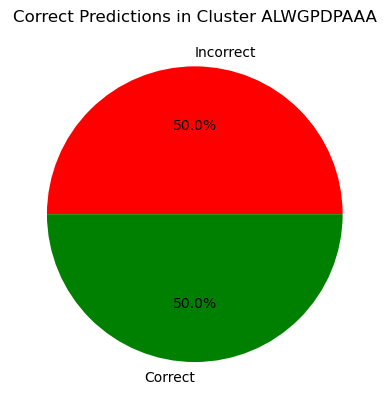

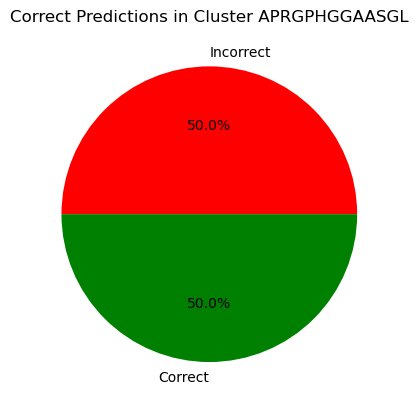

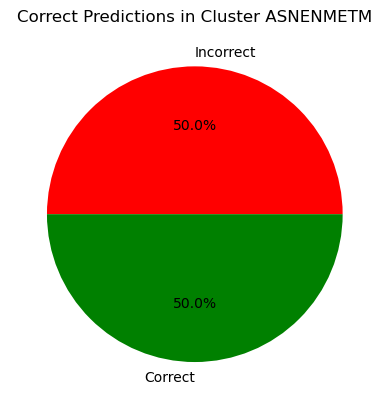

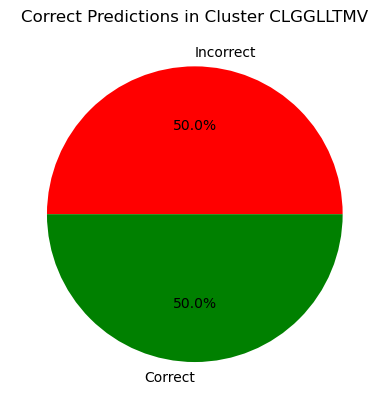

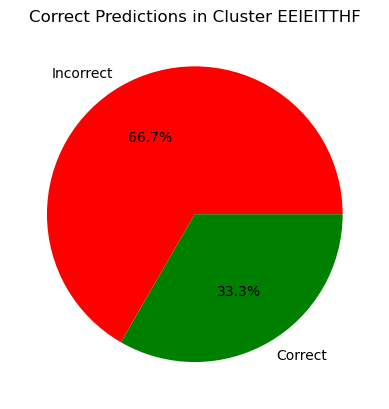

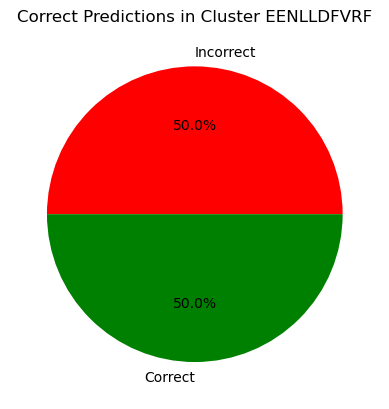

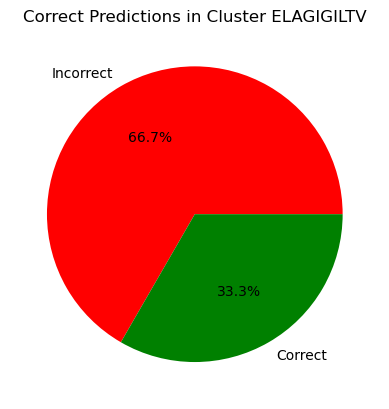

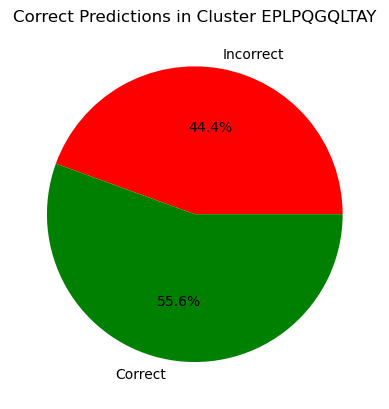

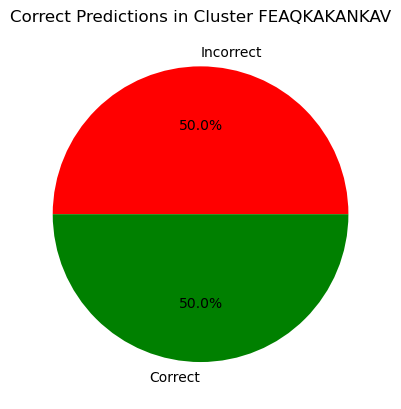

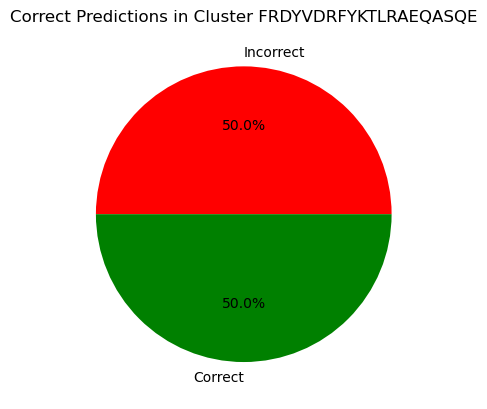

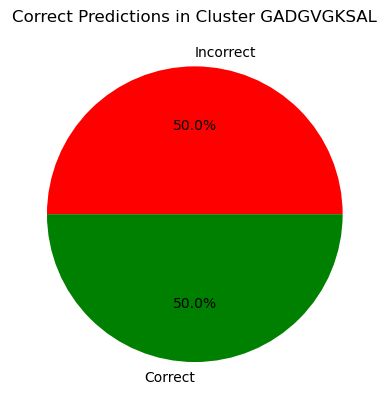

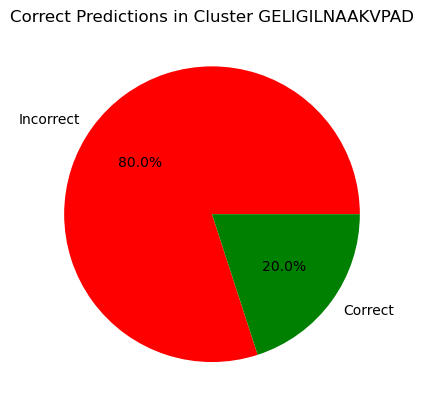

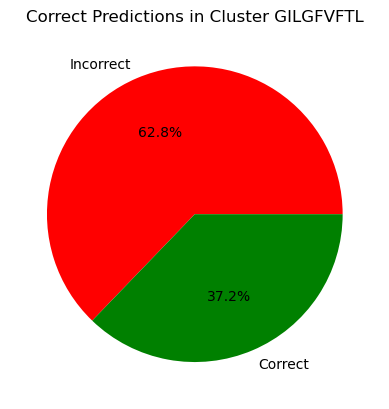

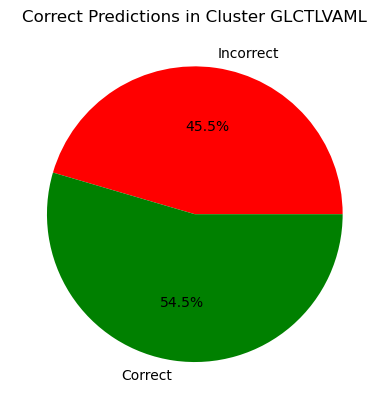

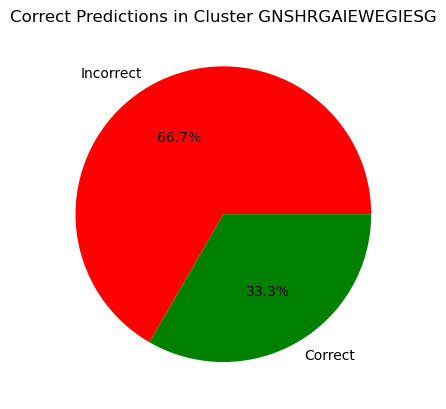

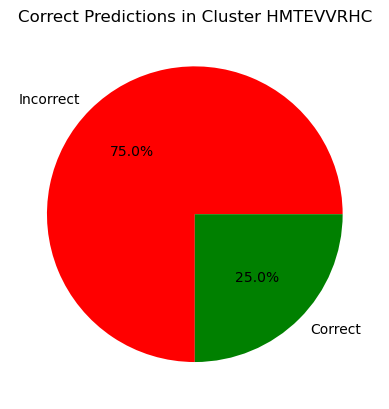

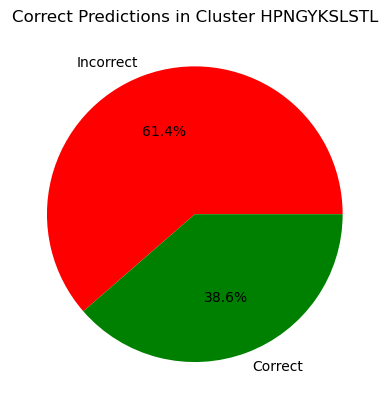

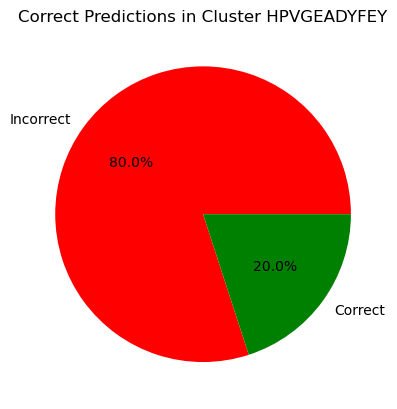

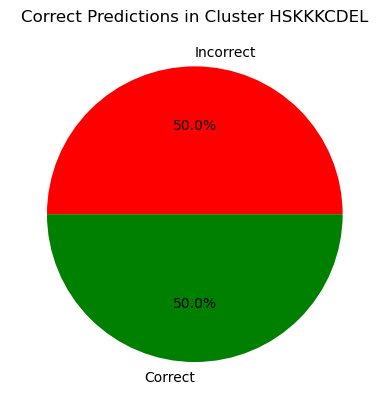

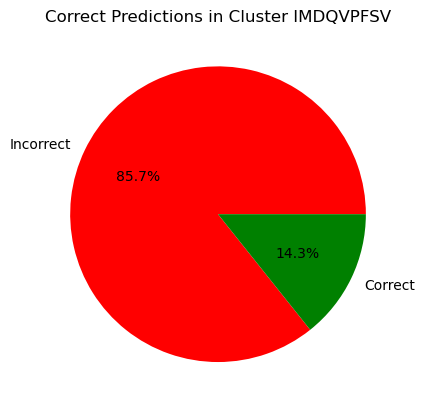

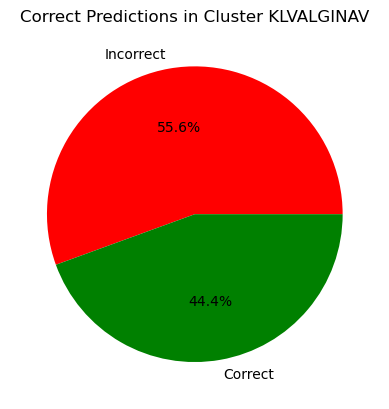

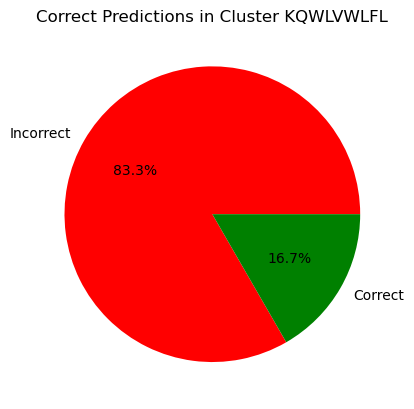

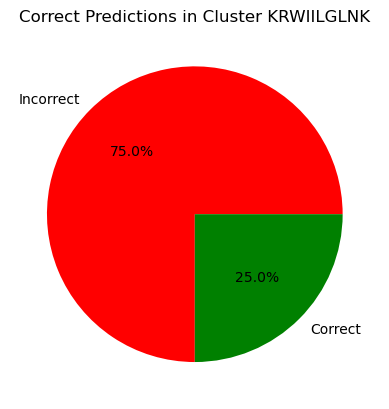

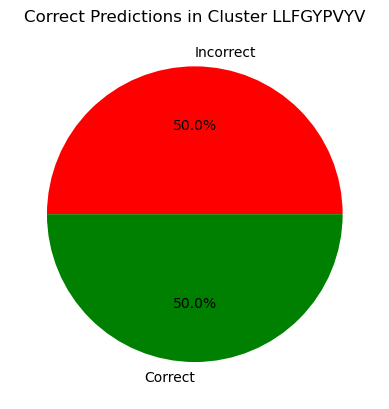

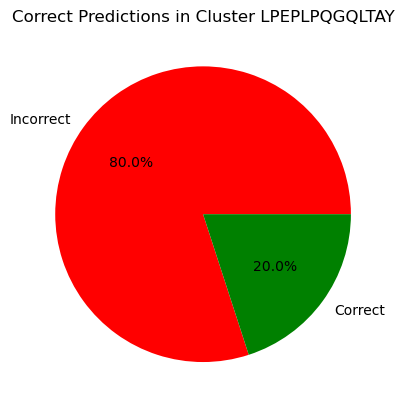

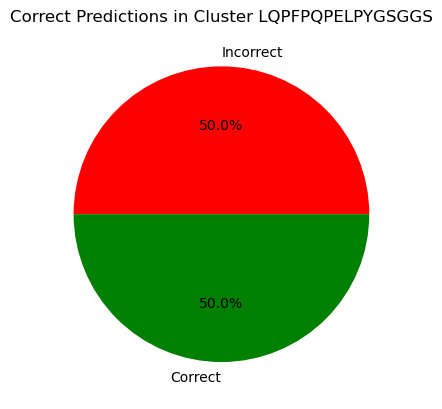

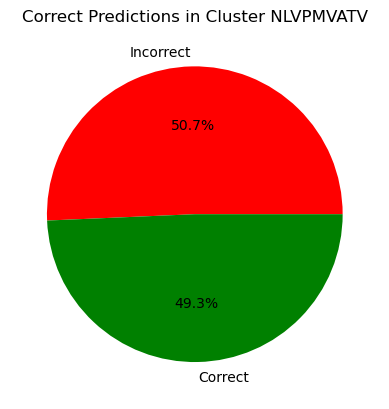

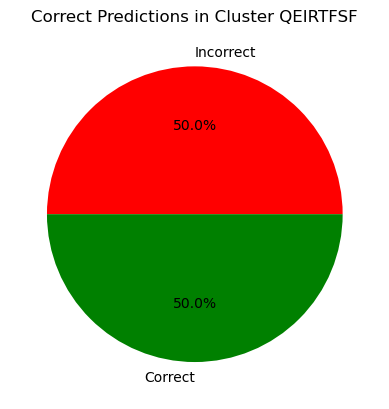

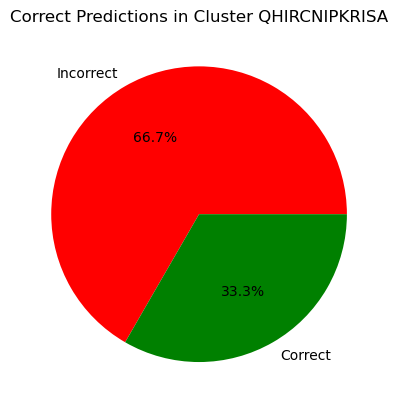

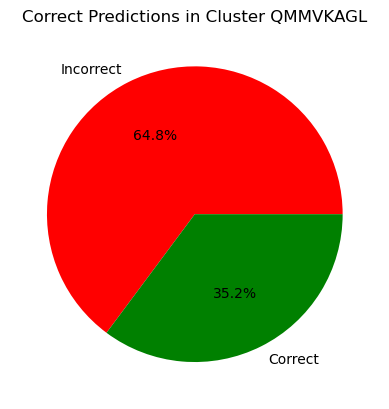

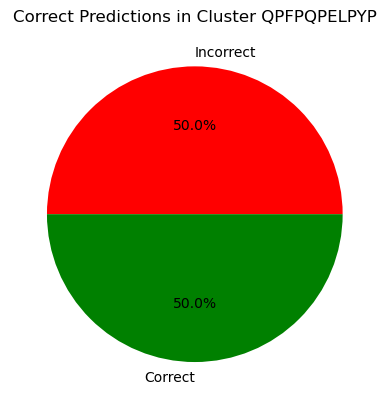

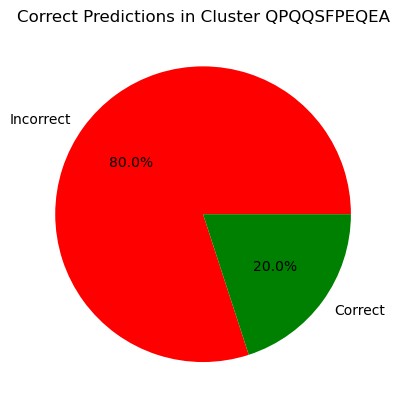

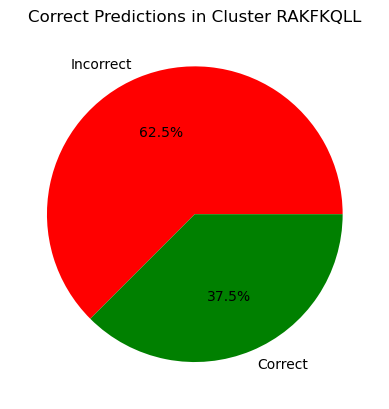

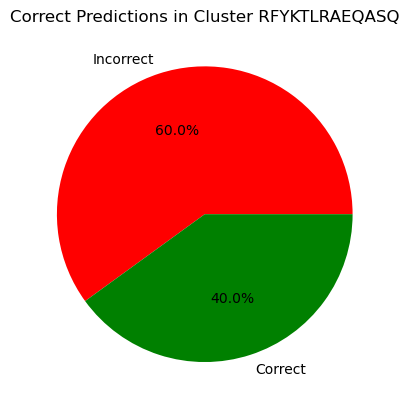

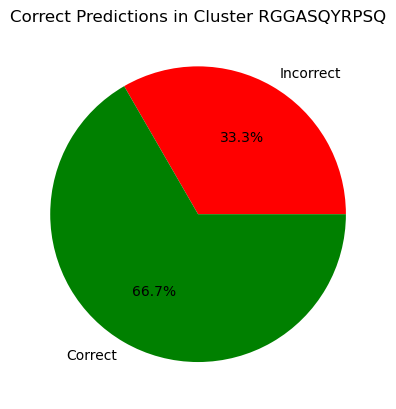

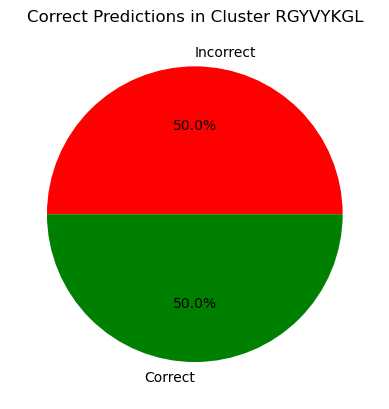

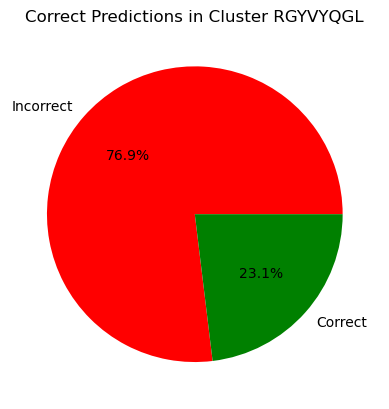

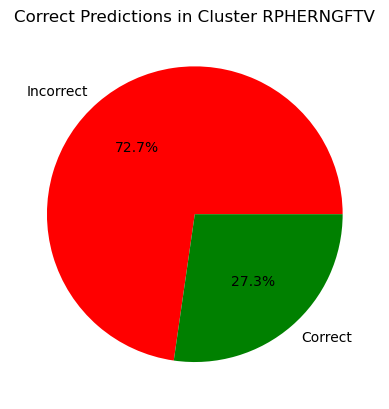

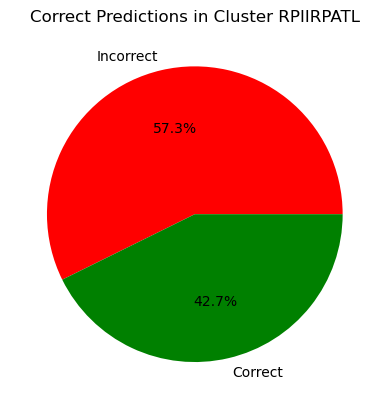

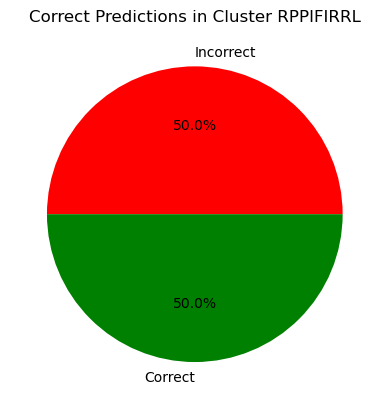

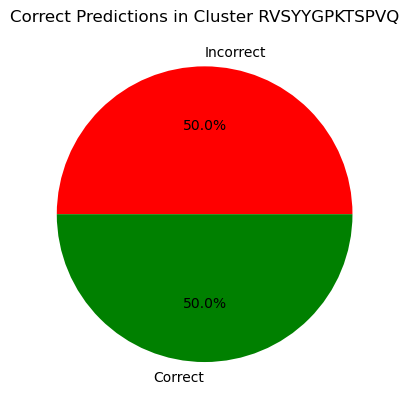

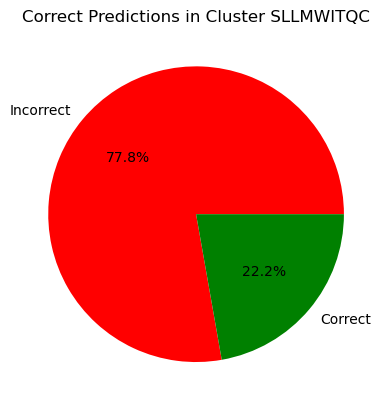

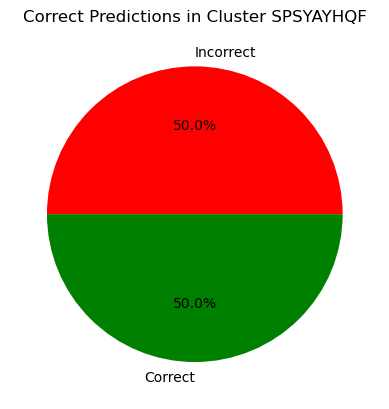

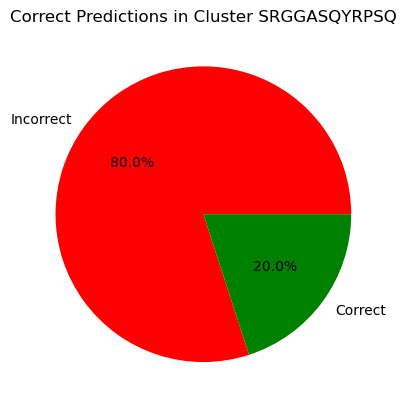

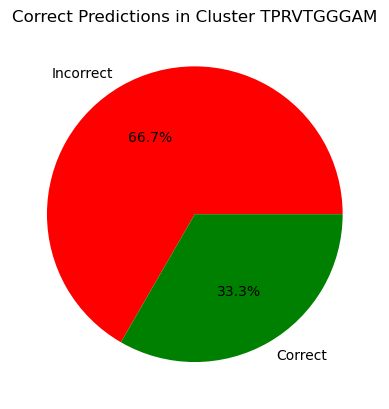

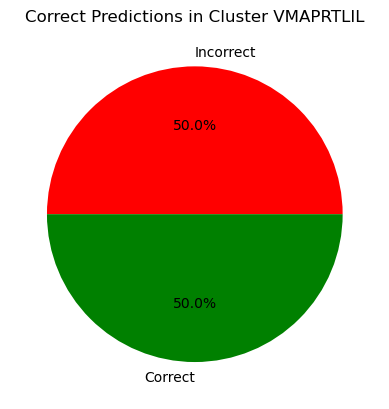

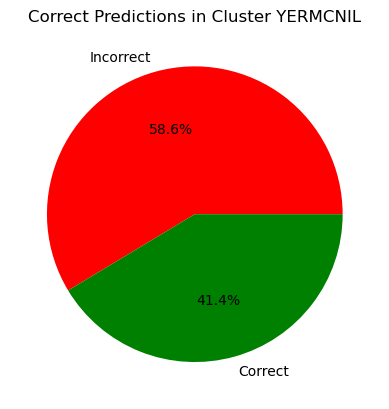

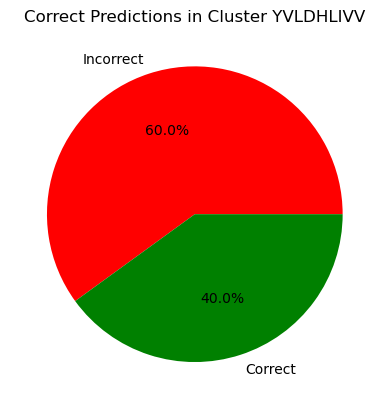

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


df = pd.read_csv("output_files/tests/cdr3/predicted clusters.csv")
df['correct_prediction'] = (df['antigen.epitope'] == df['epitope.pred']).astype(int)

cluster_summary = df.groupby('epitope.pred')['correct_prediction'].value_counts(normalize=True).unstack()

for cluster_id, row in cluster_summary.iterrows():
    plt.figure()
    plt.pie(row, labels=['Incorrect', 'Correct'], autopct='%1.1f%%', colors=['red', 'green'])
    plt.title(f'Correct Predictions in Cluster {cluster_id}')
    plt.show()